# Part II - Effect of Estimated Loss on Estimated Return and Borrower Rate
## by Akhila

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Estimated Loss

> Here we have the distribution of estimated Loss. We see that the estimated Loss stays around the 0 to 0.20 area. We see that the highest number of estimated losses are from 0.05 and 0.10. We can assume that the estimated loss are relatively low because the numbers are relatively low. 


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
loandata = pd.read_csv('prosperLoanData.csv')



In [15]:
# creating the categorical variables needed for the graphs
ordinal_var_dict = {'CreditGrade': ['A','B','C','D','E'],
                    'LoanStatus': ['Current','Completed','Chargeoff','Cancelled','Defaulted','FinalPaymentInProgress']}
                    

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loandata[var] = loandata[var].astype(ordered_var)

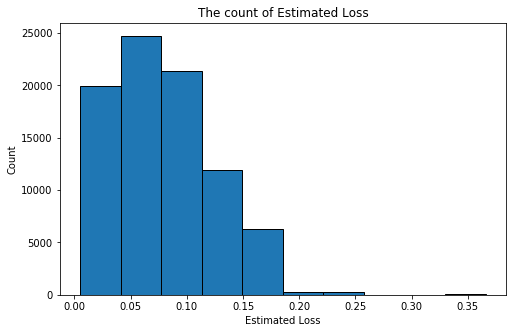

In [16]:
# drop na
data=loandata.dropna(subset=['EstimatedLoss']).copy()

# start with a standard-scaled plot
binsize = 500
bins = np.arange (0, data['EstimatedLoss'].max ()+binsize, binsize)
plt.figure(figsize= [8,5])
plt.hist(data=data, x='EstimatedLoss', edgecolor='black') 

plt.xlabel("Estimated Loss")
plt.ylabel("Count")
plt.title("The count of Estimated Loss")
plt.show ()

## Heat map on estimated loss and return based on Loan Status

> Estimated Loss and estimated return have the high correlation for current loan status.
> There is a slight correlation between estimated loss and estimated return.
> They also have a high correlation for past due (1-15 days)

In [17]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [18]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(-.2, .29+0.025, .025)
    bins_y = np.arange(0.1, 0.4+0.025, 0.025)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)


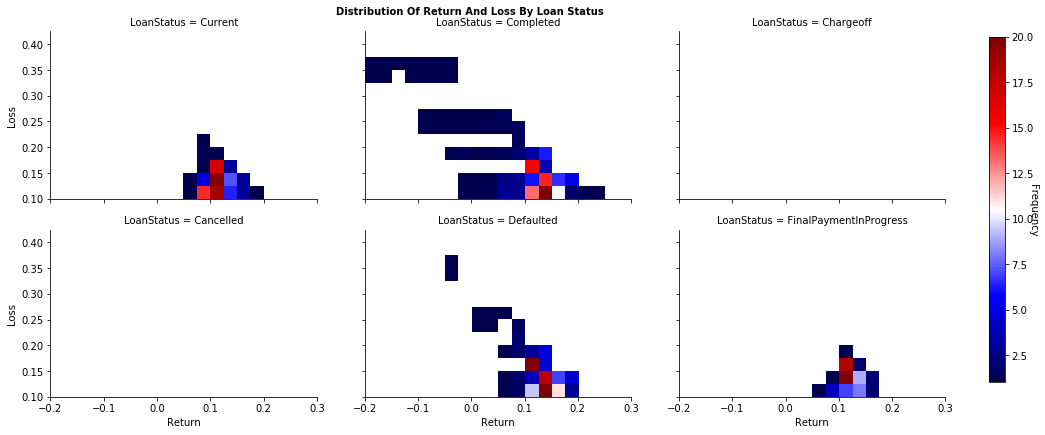

In [19]:
numeric_vars = ['EstimatedLoss', 'EstimatedReturn', 'BorrowerRate']

# create faceted heat maps on estimated loss and return based on loan status
g = sb.FacetGrid(data = data, col = 'LoanStatus', col_wrap = 3, size = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'EstimatedReturn', 'EstimatedLoss', color = 'seismic')
g.set_xlabels('Return')
g.set_ylabels('Loss')

# create a 'subplot' for the colorbar
cbar_ax = g.fig.add_axes([1.015,0.13,0.015,0.8])
# create color bar, place it in the 'subplot'
cbar = plt.colorbar(cax=cbar_ax)
cbar.set_label('Frequency',rotation=270)

# IF a visualization has subplots, add a MAIN title 
plt.suptitle("Distribution of return and loss by loan status".title(), y=1, fontsize=10, weight = 'bold')

## Set plot Dimensions -Figure Level
g.fig.set_size_inches(14,6);

plt.show()

## Plot all four Variables to see each distrubution
> The estimated loss graph is skewed to the right. THis means the mean is greaeter than the median.
> The estimated return graph is skewed to the left. This measn the mean is less than the median.
> Borrower rate and Borrower apr both have a normal distribution. 




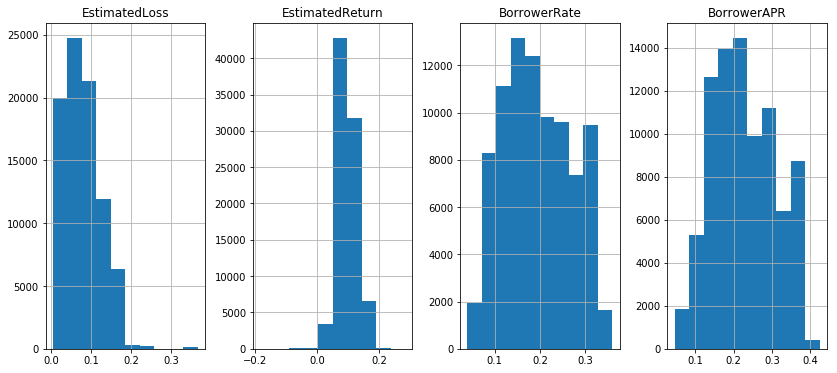

In [20]:
fig, axes = plt.subplots(1, 4, figsize = [14,6])

data.hist('EstimatedLoss', ax=axes[0])
data.hist('EstimatedReturn', ax=axes[1])
data.hist('BorrowerRate', ax=axes[2])
data.hist('BorrowerAPR', ax=axes[3])


plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_AkhilaFinalProject.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_AkhilaFinalProject.ipynb to slides
[NbConvertApp] Writing 346451 bytes to Part_II_AkhilaFinalProject.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_AkhilaFinalProject.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
